In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
invoice_df = pd.read_csv(r'./Customer Segmentation/Customer_invoice_data.csv', encoding='latin1')

In [3]:
# data information

invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
print(invoice_df.head)

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerI

In [5]:
# checking for missing data
print(invoice_df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# dropping customerID rows with null values
invoice_df = invoice_df.dropna()

In [7]:
# Descriptive Statistics
invoice_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# checking for missing data
print(invoice_df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [9]:
# Check for duplicate rows
duplicates = invoice_df[invoice_df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/2010 

In [10]:
# dropping the duplicated rows
invoice_df = invoice_df[~invoice_df.duplicated(keep=False)]

In [11]:
invoice_df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

InvoiceNo columns

In [14]:
invoice_df['InvoiceNo'] = pd.to_numeric(invoice_df['InvoiceNo'], errors='coerce', downcast='integer')

In [15]:
# Handle NaN values (replace with 0 in this example)
invoice_df['InvoiceNo'] = invoice_df['InvoiceNo'].fillna(0)

# Handle floating-point values (round in this example)
invoice_df['InvoiceNo'] = invoice_df['InvoiceNo'].round().astype(int)

In [16]:
# Handle NaN values (replace with 0 in this example)
invoice_df['InvoiceNo'] = invoice_df['InvoiceNo'].fillna(0)

In [17]:
# Count the number of rows with 0 values in the 'InvoiceNo' column
num_rows_with_zero = (invoice_df['InvoiceNo'] == 0).sum()

# Display the number of rows with 0 values
print(f"Number of rows with 0 values in 'InvoiceNo': {num_rows_with_zero}")

Number of rows with 0 values in 'InvoiceNo': 8844


In [18]:
# deleting the rows with 0 invoiceno as 0
invoice_df = invoice_df[invoice_df['InvoiceNo'] != 0]

In [19]:
print(invoice_df['InvoiceNo'])

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 387923, dtype: int64


StockCode column

In [20]:
invoice_df['StockCode'].isna().sum()

0

Description column

In [21]:
invoice_df['Description'].isna().sum()

0

In [26]:
# Specify the column name you want to clean
column_to_clean = 'InvoiceNo'

# Convert the column to string type
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].astype(str)

# Remove leading and trailing spaces
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].str.strip()

# Replace consecutive spaces with a single space
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].str.replace('\s{2,}', ' ', regex=True)


In [30]:
# remove extra space at the end of a text in a column
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].str.rstrip()

Quantity column

In [32]:
invoice_df.loc[:, 'Quantity'] = pd.to_numeric(invoice_df.loc[:, 'Quantity'], errors='coerce', downcast='integer')

In [33]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387923 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    387923 non-null  object 
 1   StockCode    387923 non-null  object 
 2   Description  387923 non-null  object 
 3   Quantity     387923 non-null  int32  
 4   InvoiceDate  387923 non-null  object 
 5   UnitPrice    387923 non-null  float64
 6   CustomerID   387923 non-null  float64
 7   Country      387923 non-null  object 
dtypes: float64(2), int32(1), object(5)
memory usage: 25.2+ MB


CustomerID

In [34]:
invoice_df.loc[:, 'CustomerID'] = pd.to_numeric(invoice_df.loc[:, 'CustomerID'], errors='coerce', downcast='integer')


In [35]:
invoice_df['CustomerID'].isna().sum()

0

In [37]:

# Check for the specific rows
result = invoice_df[
    (invoice_df["InvoiceNo"] == 536409) &
    (invoice_df['Description'] == "PHOTO CLIP LINE") &
    (invoice_df["CustomerID"] == 15311.0)
]

# Display the result
print(result)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


# EDA

In [40]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387923 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    387923 non-null  object 
 1   StockCode    387923 non-null  object 
 2   Description  387923 non-null  object 
 3   Quantity     387923 non-null  int32  
 4   InvoiceDate  387923 non-null  object 
 5   UnitPrice    387923 non-null  float64
 6   CustomerID   387923 non-null  float64
 7   Country      387923 non-null  object 
dtypes: float64(2), int32(1), object(5)
memory usage: 25.2+ MB


In [42]:
invoice_df.describe()

,Quantity,UnitPrice,CustomerID
count,387923.000000,387923.00000,387923.000000
mean,13.278617,3.13463,15281.620997
std,182.690206,22.37660,1713.954340
min,1.000000,0.00000,12346.000000
25%,2.000000,1.25000,13941.000000
50%,6.000000,1.95000,15144.000000
75%,12.000000,3.75000,16788.000000
max,80995.000000,8142.75000,18287.000000


In [43]:
invoice_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [44]:
invoice_df.nunique()

InvoiceNo      18535
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

In [45]:
invoice_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 387923, dtype: bool

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

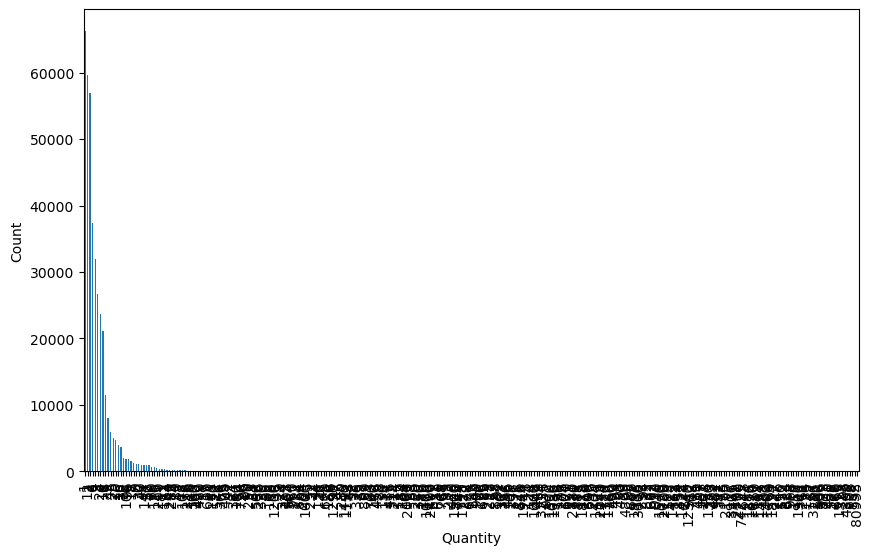

In [69]:
#plt.plot(invoice_df['Quantity'], invoice_df['UnitPrice'])
invoice_df['Quantity'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

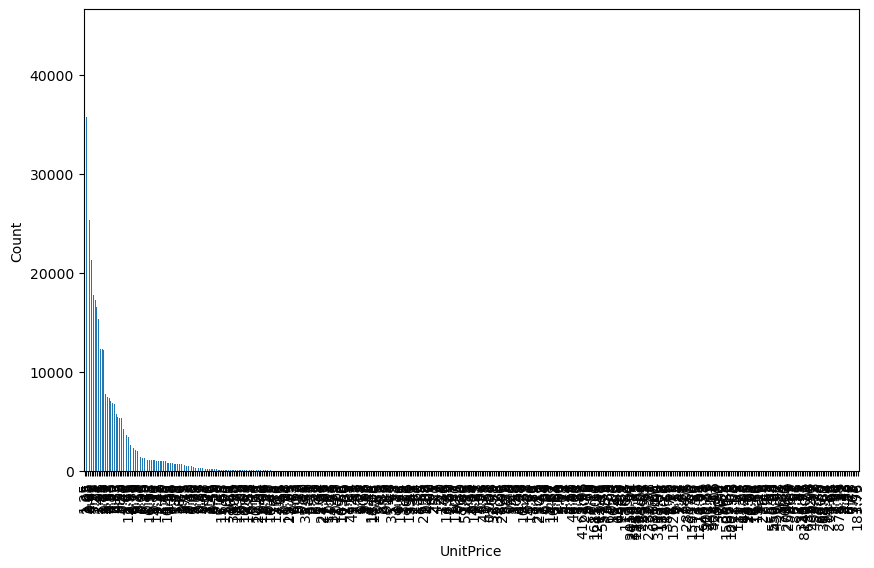

In [70]:
invoice_df['UnitPrice'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('UnitPrice')
plt.ylabel('Count')
plt.show()

In [56]:
print(invoice_df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [63]:
column_to_check = 'Quantity'

# Check for zeroes in the specified column
zeroes_in_column = invoice_df['Quantity'] == 0
# Display the rows where the specified column has zeroes
print(invoice_df[zeroes_in_column])

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Quantity, Length: 387923, dtype: bool
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [78]:
len(invoice_df[invoice_df['Quantity'] > 10000])

0

In [75]:
rows_to_remove = invoice_df[invoice_df['Quantity'] > 10000].index

invoice_df = invoice_df.loc[~invoice_df.index.isin(rows_to_remove)]

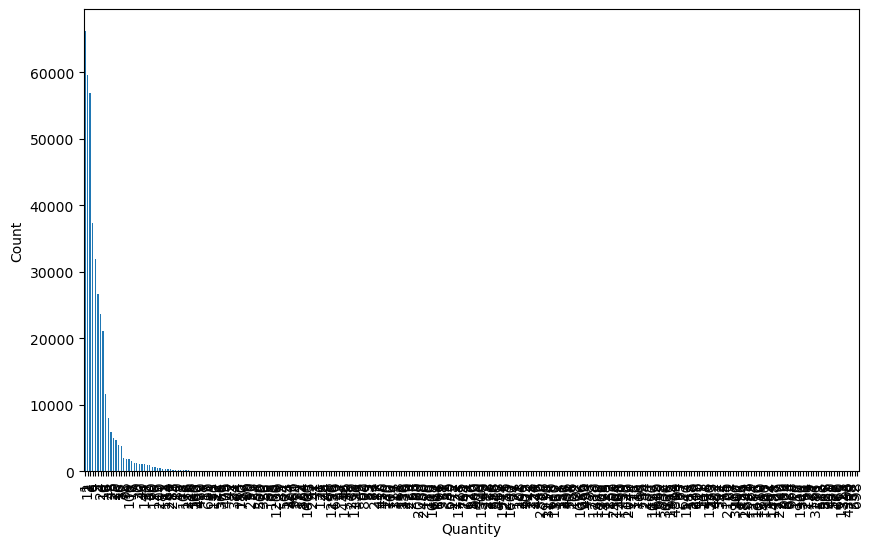

In [76]:
invoice_df['Quantity'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()